# 12_Matplotlib and Seaborn

**[1] Matplotlib**<br>
- Single plot <br>
- Multiple plots <br>
- Secondary axis<br>

**[2] Seaborn**<br>
- X-axis with categorical data<br>
- Numbercial data<br>
- Facet grid<br>

In [1]:
import pandas as pd

## [1] matplotlib

In [2]:
import matplotlib.pyplot as plt

In [3]:
sales_df = pd.DataFrame({"Sales":[113, 84, 87, 50, 97, 68, 48, 54, 37, 38, 40, 57],
                         "Cumulative_sales":[113, 197, 284, 334, 431, 499, 547, 601, 638, 676, 716, 773]}, 
                        index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
sales_df 

,Sales,Cumulative_sales
Jan,113,113
Feb,84,197
Mar,87,284
Apr,50,334
May,97,431
Jun,68,499
Jul,48,547
Aug,54,601
Sep,37,638
Oct,38,676


- **Create figure and axes**

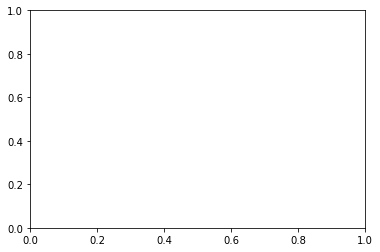

In [4]:
#step1: Create a figure and axes
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot()

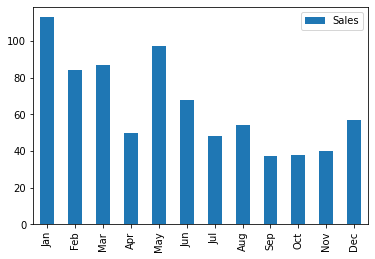

In [35]:
#step1: Create a figure and axes
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot()

#step2: Plot a chart in axes
sales_df.plot(kind = "bar", y = "Sales",  ax = ax1);

- **Create figure and axes - custom style**

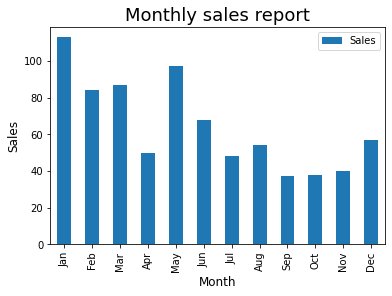

In [6]:
#step1: Create a figure and axes
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot()

#step2: Plot a chart in axes
sales_df.plot(kind = "bar", y = "Sales", ax = ax1)

#step3: Format the style
ax1.set_title("Monthly sales report", fontsize=18)
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Sales", fontsize=12);

- **Multiple subplots**

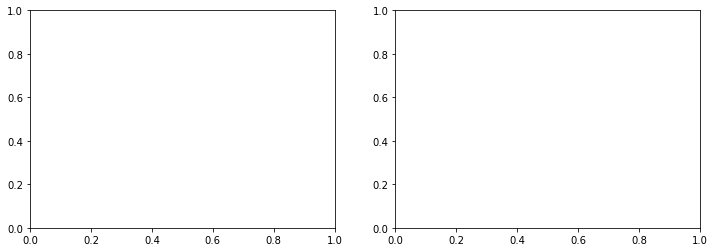

In [7]:
#step1: Create a figure and axes
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

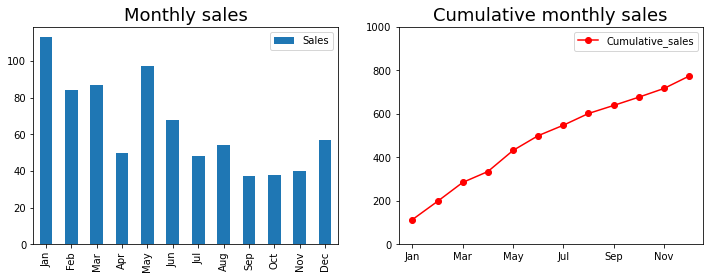

In [8]:
#step1: Create a figure and axes
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
#step2: Plot a chart in axes
sales_df.plot(kind = "bar", y = "Sales", ax=ax1)
sales_df.plot(kind = "line", y = "Cumulative_sales", ax=ax2, color = "red", marker = "o")
#step3: Format the style
ax1.set_title("Monthly sales", fontsize = 18)
ax2.set_title("Cumulative monthly sales", fontsize = 18)
ax2.set_ylim([0,1000]);

- **Secondary y-axis**

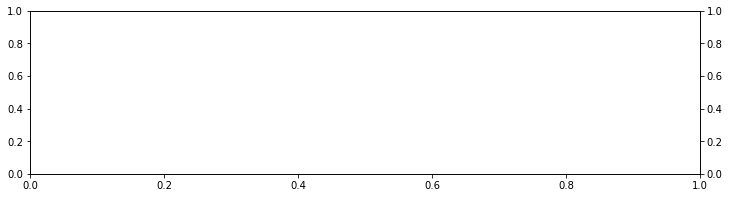

In [9]:
#step1: Create a figure and axes
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

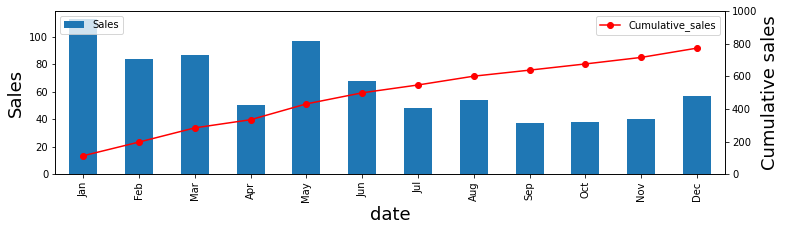

In [10]:
#step1: Create a figure and axes
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
#step2: Plot a chart in axes
sales_df.plot(kind = "bar", y = "Sales", ax=ax1)
sales_df.plot(kind = "line", y = "Cumulative_sales", ax=ax2, color = "red", marker = "o")
#step3: Format the style
ax1.set_xlabel("date", fontsize = 18)
ax1.set_ylabel("Sales", fontsize = 18)
ax1.legend(loc="upper left")
ax2.set_ylabel("Cumulative sales", fontsize = 18)
ax2.set_ylim([0,1000])
ax2.legend(loc="upper right");

## Exercise.A

In [11]:
import random
random.seed(0)
product_df = pd.DataFrame({"A":[random.randint(100,150) for i in range(6)],"B":[random.randint(20,150) for i in range(6)],
                           "C":[random.randint(120,150) for i in range(6)]}, index = ["Jan","Feb","Mar","Apr","May","Jun"])
product_df

,A,B,C
Jan,124,144,136
Feb,148,123,124
Mar,126,97,129
Apr,102,142,124
May,116,111,144
Jun,132,75,123


**(A.1) Given the synthetic dataset above, each column represents the quarterly sales of products A, B, and C. Create a figure with three bar charts to show the sales data of each product.**<br>
Setting: <code>figsize = (15,4)</code>

Text(0.5, 1.0, 'Product-C')

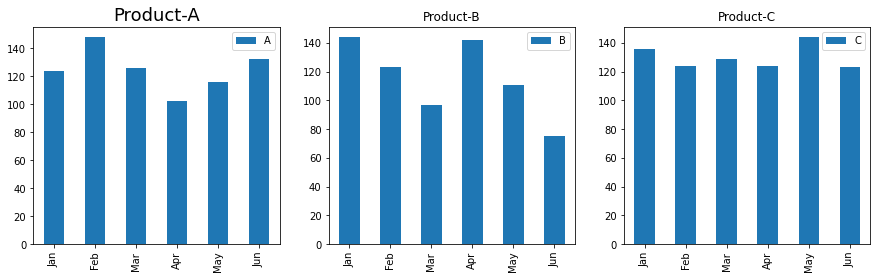

In [43]:
#step1:
fig = plt.figure(figsize = (15,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#step2:
product_df.plot(kind = "bar", y = "A", ax = ax1)
product_df.plot(kind = "bar", y = "B", ax = ax2)
product_df.plot(kind = "bar", y = "C", ax = ax3)

#step3:
ax1.set_title("Product-A", fontsize = 18)
ax2.set_title("Product-B")
ax3.set_title("Product-C")

## [2] Seaborn

In [12]:
import seaborn as sns

In [13]:
wine_raw_df = pd.read_csv("../dataset/wine.csv", index_col = [0])
wine_df = wine_raw_df[(wine_raw_df.country.isin(["Spain","Italy","France"])&
                       (wine_raw_df.price<200)&
                       (wine_raw_df.variety.isin(["Red Blend","Tempranillo","Chardonnay", "Pinot Noir", "Cabernet Sauvignon"])))]
wine_df.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
17,Spain,"Nicely oaked blackberry, licorice, vanilla and...",6 Años Reserva Premium,95,80.0,Northern Spain,Ribera del Duero,NaN,Tempranillo,Valduero
39,Italy,"This bright, savory wine delivers aromas and f...",Riserva,90,29.0,Tuscany,Chianti Classico,NaN,Red Blend,Castello di Monterinaldi
43,Italy,"Aromas of dark-skinned berry, rose and wild he...",Riserva,90,39.0,Tuscany,Chianti Classico,NaN,Red Blend,Rignana
45,Italy,"A blend of 90% Sangiovese and 10% Canaiolo, th...",Vigneto Odoardo Beccari Riserva,90,30.0,Tuscany,Chianti Classico,NaN,Red Blend,Vignavecchia
51,France,"This structured, complex Chardonnay is packed ...",NaN,90,68.0,Burgundy,Chassagne-Montrachet,NaN,Chardonnay,Chartron et Trébuchet


### [2.1] X-axis with categorical data

- **Countplot**

<AxesSubplot:xlabel='country', ylabel='count'>

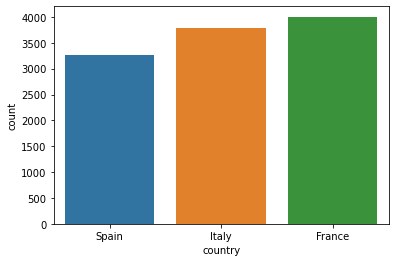

In [14]:
sns.countplot(data = wine_df, x = "country")

In [45]:
df = pd.DataFrame({"France":100,"Spain":200,"Italy":300}, index = [0])
df

,France,Spain,Italy
0,100,200,300


<AxesSubplot:ylabel='count'>

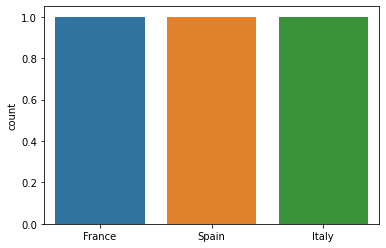

In [46]:
sns.countplot(data = df)

- **Countplot - group by a categorical variable**

<AxesSubplot:xlabel='country', ylabel='count'>

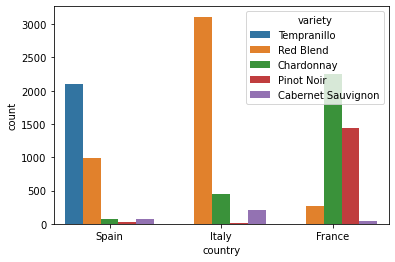

In [15]:
sns.countplot(data = wine_df, x = "country", hue = "variety")

- **Bar plot**

<AxesSubplot:xlabel='variety', ylabel='price'>

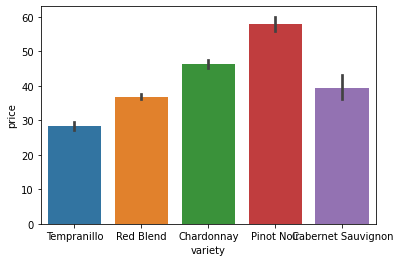

In [16]:
sns.barplot(data = wine_df, x = "variety", y = "price")

- **Heatmap**

In [17]:
# data preparation
heatmap_data = pd.crosstab(wine_df["variety"],wine_df["country"])
heatmap_data

country,France,Italy,Spain
variety,,,
Cabernet Sauvignon,44,214,74
Chardonnay,2247,450,67
Pinot Noir,1446,7,31
Red Blend,267,3111,987
Tempranillo,0,1,2099


<AxesSubplot:xlabel='country', ylabel='variety'>

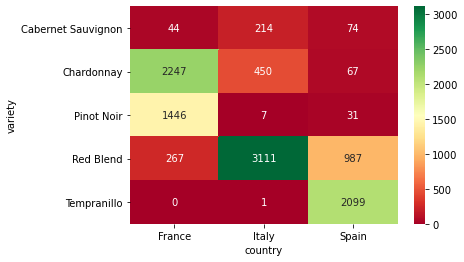

In [18]:
sns.heatmap(data = heatmap_data, annot = True, fmt = "d", cmap = "RdYlGn")

## Exercise.B

The sinking of the Titanic is one of the most infamous shipwrecks in history, resulting in the death of 1502 out of 2224 passengers and crew. 
- **survived**: 0 = No, 1 = Yes
- **pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sex**: sex
- **age**: Age
- **sibsp**: number of siblings / spouses aboard the Titanic
- **parch**: number of parents / children aboard the Titanic  
- **fare**: Passenger fare
- **embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)    

In [19]:
titanic_df = sns.load_dataset("titanic", dtype = {"survived": object, "pclass":object})

**(B.1) Show the first 10 rows of the dataset.**

In [47]:
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


**(B.2) Use a count plot to display the number of male and female passengers.**

<AxesSubplot:xlabel='sex', ylabel='count'>

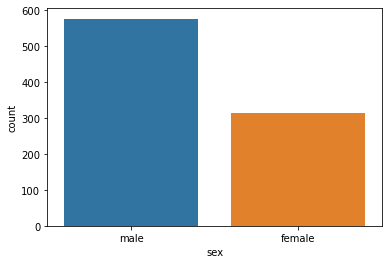

In [50]:
sns.countplot(data = titanic_df, x = "sex")

**(B.3) Use a count plot to display the number of male and female passengers, and use the column <code>survived</code> to divide the data into two subgroups.**<br>
Hint: <code>hue</code>

<AxesSubplot:xlabel='sex', ylabel='count'>

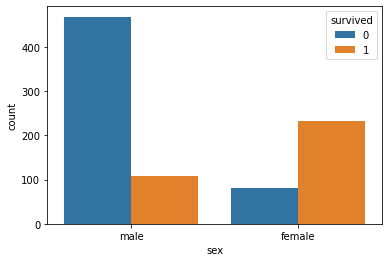

In [51]:
sns.countplot(data = titanic_df, x = "sex", hue = "survived")

**(B.4) Create a cross table based on the columns  <code>pclass</code> and <code>survived</code>.**<br>
Hint: <code>pd.crosstab()</code>

In [53]:
titanic_ct = pd.crosstab(titanic_df["pclass"], titanic_df["survived"])

**(B.5) Use the result obtained in (B.4) to draw a heatmap.**<br>
Setting: <code>cmap = "coolwarm"</code>

<AxesSubplot:xlabel='survived', ylabel='pclass'>

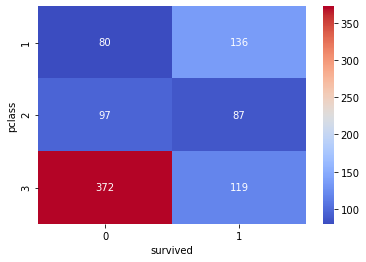

In [57]:
sns.heatmap(data = titanic_ct, cmap = "coolwarm", annot = True, fmt = "d")

### [2.2] Numerical data

In [20]:
# Import data and select observations with pressure greater than 0 (remove outliers)
diabetes_df = pd.read_csv("../dataset/diabetes.csv", dtype = {"Outcome":object})
diabetes_df = diabetes_df[diabetes_df.BloodPressure>0]

- **Histogram**

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

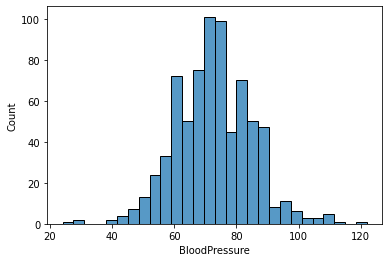

In [21]:
sns.histplot(data = diabetes_df, x = "BloodPressure")

- **Histogram - group by a categorical variable**

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

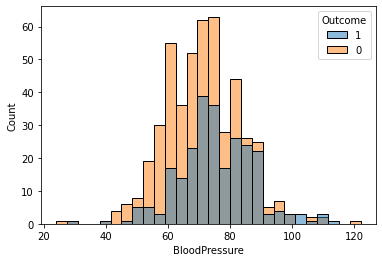

In [22]:
sns.histplot(data = diabetes_df, x = "BloodPressure", hue = "Outcome")

- **Scatter plot**

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

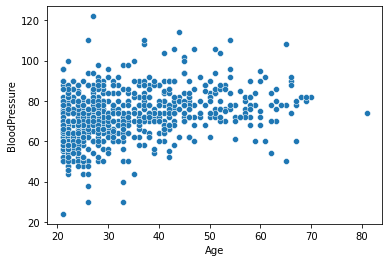

In [23]:
sns.scatterplot(data = diabetes_df, x = "Age", y = "BloodPressure")

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

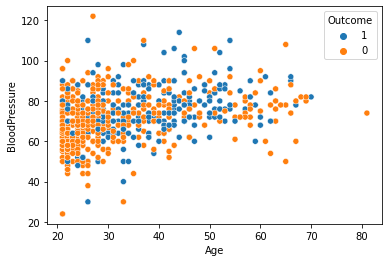

In [24]:
sns.scatterplot(data = diabetes_df, x = "Age", y = "BloodPressure", 
                hue = "Outcome")

### [2.3] Multiple plots 

- **Joint plot**

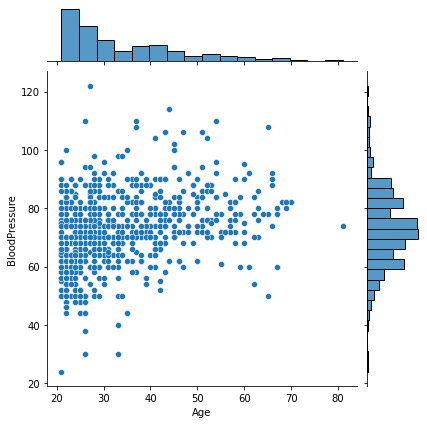

In [25]:
sns.jointplot(data = diabetes_df, x = "Age", y = "BloodPressure")

- **Joint plot - group by a categorical variable**

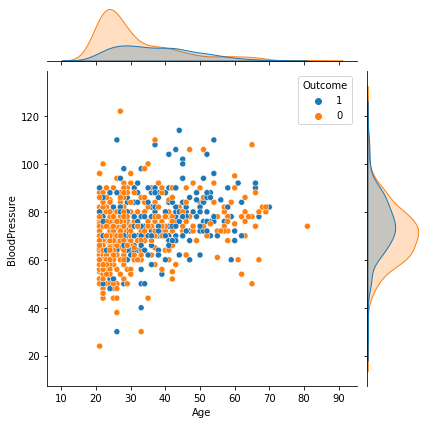

In [26]:
sns.jointplot(data = diabetes_df, x = "Age", y = "BloodPressure", hue = "Outcome")

- **Pairplot**

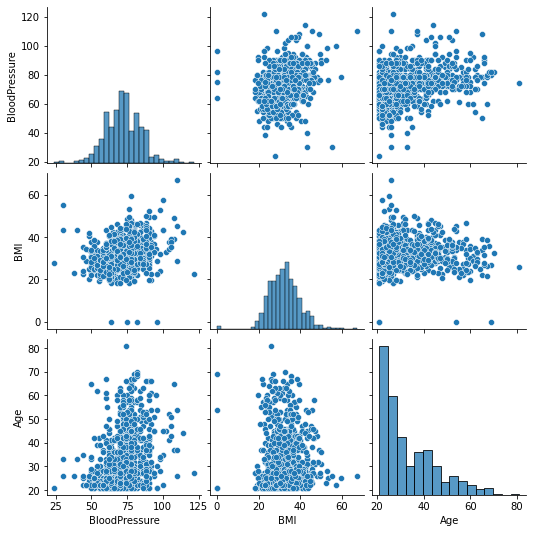

In [27]:
sns.pairplot(data = diabetes_df.loc[:,["BloodPressure","BMI", "Age"]])

- **Pair plot - group by a categorical variable**

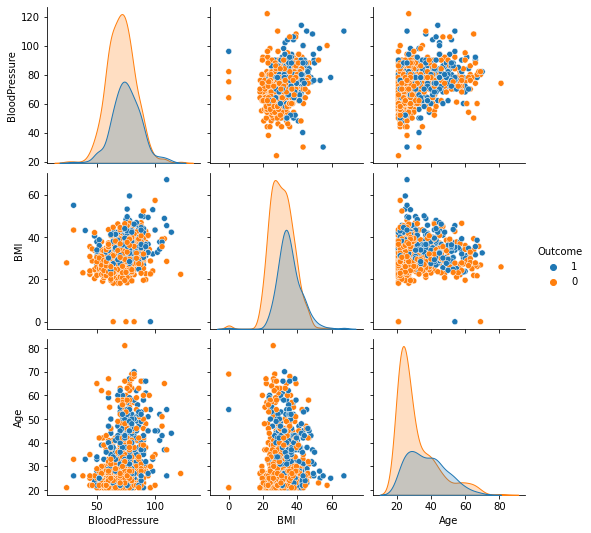

In [28]:
sns.pairplot(data = diabetes_df.loc[:,["BloodPressure","BMI", "Age", "Outcome"]], hue = "Outcome")

## Exercise.C

- **price**: Price (USD)
- **carat**: Weight of the diamond 
- **cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color**: Diamond colour, from J (worst) to D (best)
- **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x**: Length (mm)
- **y**: Width (mm) 
- **z**: Depth (mm) 
- **depth**: Total depth percentage

In [29]:
diamond_df = sns.load_dataset("diamonds")

**(C.1) Show the first 5 rows of the dataset.**

In [58]:
diamond_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**(C.2) Show the distribution of the price.**<br>
Hint: <code>histplot()</code>

<AxesSubplot:xlabel='price', ylabel='Count'>

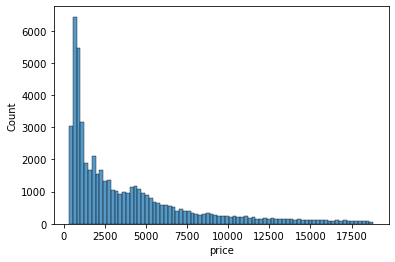

In [59]:
sns.histplot(data = diamond_df, x = "price")

**(C.3) Use a scatter plot to show the relathionship between <code>carat</code> and <code>price</code> of the best clarity diamonds.**<br>
Hint: Select a subset by using <code>diamond_df.clarity == "IF"</code>

<AxesSubplot:xlabel='carat', ylabel='price'>

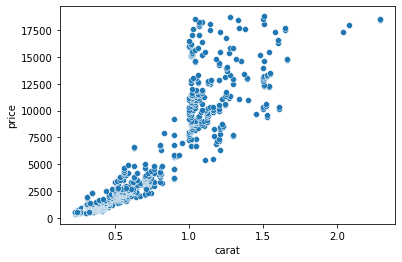

In [61]:
sns.scatterplot(data = diamond_df[diamond_df.clarity == "IF"], x = "carat", y = "price")

**(C.4) Use a join plot to show the relathionship between <code>carat</code> and <code>price</code> of the best clarity diamonds and their individual distributions.**

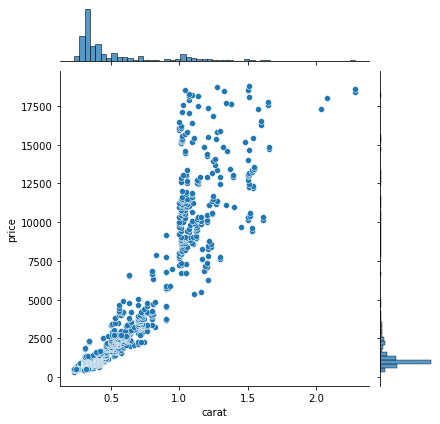

In [62]:
sns.jointplot(data = diamond_df[diamond_df.clarity == "IF"], x = "carat", y = "price")

## [2.3] FacetGrid

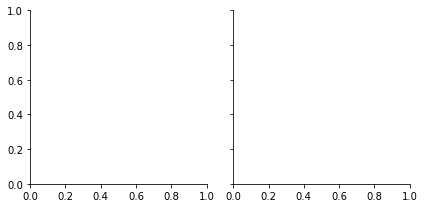

In [30]:
# Initialize the grid
fig =  sns.FacetGrid(data = diabetes_df, col = "Outcome")

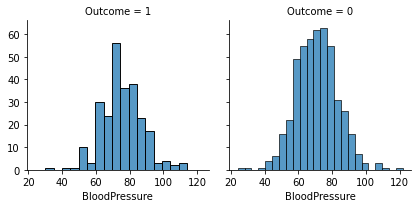

In [31]:
# Draw a plot on every facet
fig = sns.FacetGrid(data =diabetes_df, col="Outcome")
fig.map(sns.histplot, "BloodPressure")

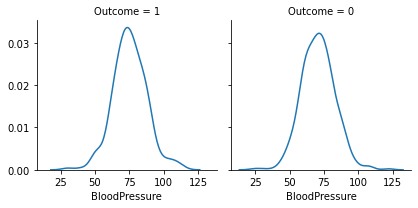

In [32]:
fig = sns.FacetGrid(data = diabetes_df, col="Outcome")
fig.map(sns.kdeplot, "BloodPressure")

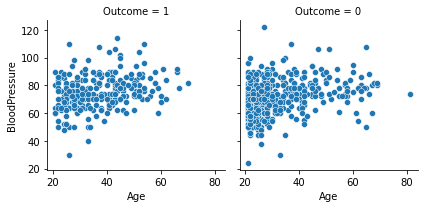

In [33]:
fig = sns.FacetGrid(data = diabetes_df, col = "Outcome")
fig.map(sns.scatterplot,"Age", "BloodPressure")

## Exercise.D

**(D.1) Use the dataframe <code>diamond_df</code> in (C.1). Draw a price histogram for each <code>cut</code> category.**<br>
Hint: <code>col="cut"</code>

In [64]:
diamond_df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

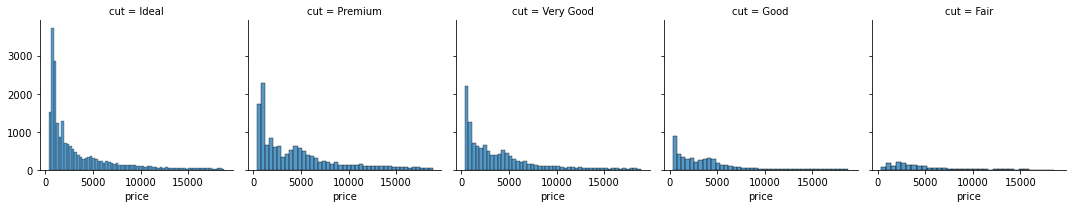

In [67]:
fig = sns.FacetGrid(data = diamond_df, col = "cut")
fig.map(sns.histplot, "price")